## Name : Khairul Basar
## Roll : 1811176143

## Import necessary library 

In [53]:

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score

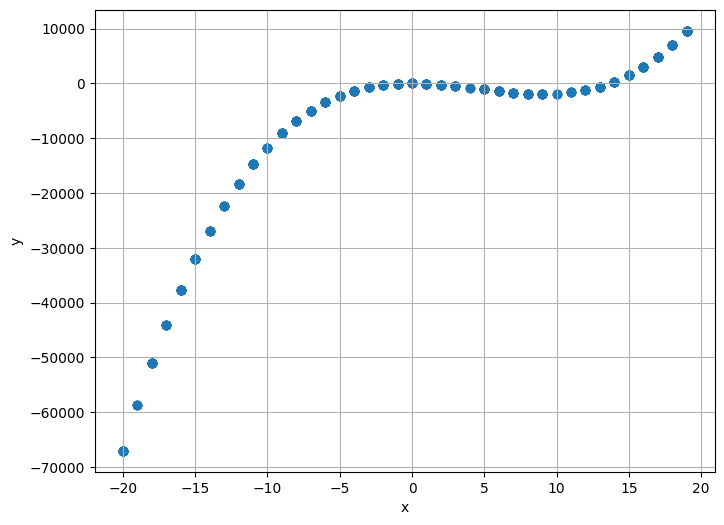

In [54]:
samples = 400
x = np.random.randint(-20, 20, samples, dtype=int)
y = 5 * (x**3) - 68 * (x**2) - 7 * x + 1

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [55]:
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1

#print(len(x_normalized), len(y_normalized))

In [56]:
x_train = x_normalized[ : int(len(x_normalized) * 0.8)]
y_train = y_normalized[: int(len(y_normalized) * 0.8)]

x_validate = x_normalized[int(len(x_normalized) * 0.8) : int(len(x_normalized) * 0.90)]
y_validate = y_normalized[int(len(y_normalized) * 0.8) : int(len(y_normalized) * 0.90)]

x_test = x_normalized[int(len(x_normalized) * 0.90) : ]
y_test = y_normalized[int(len(y_normalized) * 0.90) : ]

print(len(x_test), len(y_test))

40 40


In [57]:
inputs = Input(shape=(1), name = 'inputLayer')

h_layer = Dense(units = 32, activation = 'relu', name = 'hidden_layer1')(inputs)
h_layer = Dense(units = 64, activation = 'relu', name = 'hidden_layer2')(h_layer)
h_layer = Dense(units = 128, activation = 'relu', name = 'hidden_layer3')(h_layer)
h_layer = Dense(units = 32, activation = 'relu', name = 'hidden_layer4')(h_layer)   

outputs = Dense(units = 1, name = 'outputLayer')(h_layer)
model = Model(inputs, outputs, name = 'DNN_Model')
model.summary()

Model: "DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 1)]               0         
                                                                 
 hidden_layer1 (Dense)       (None, 32)                64        
                                                                 
 hidden_layer2 (Dense)       (None, 64)                2112      
                                                                 
 hidden_layer3 (Dense)       (None, 128)               8320      
                                                                 
 hidden_layer4 (Dense)       (None, 32)                4128      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 14657 (57.25 KB)
Trainable params: 14657 (5

In [58]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='mean_squared_error',
    metrics=R2Score()
)


In [59]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_validate, y_validate))

Epoch 1/10


10/10 [==============================] - 4s 84ms/step - loss: 0.3342 - r2_score: -0.3405 - val_loss: 0.1928 - val_r2_score: -0.8116
Epoch 2/10
10/10 [==============================] - 0s 14ms/step - loss: 0.1640 - r2_score: 0.3422 - val_loss: 0.1333 - val_r2_score: -0.2521
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 0.1146 - r2_score: 0.5405 - val_loss: 0.0765 - val_r2_score: 0.2815
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0581 - r2_score: 0.7669 - val_loss: 0.0306 - val_r2_score: 0.7130
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0253 - r2_score: 0.8985 - val_loss: 0.0105 - val_r2_score: 0.9016
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0074 - r2_score: 0.9704 - val_loss: 0.0044 - val_r2_score: 0.9582
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0061 - r2_score: 0.9756 - val_loss: 0.0038 - val_r2_score: 0.9639
Epoch 8/10
10/10 [===

In [60]:
y_pred = model.predict(x_test)
#y_pred.shape

2/2 [==============================] - 0s 16ms/step


In [61]:
x_test = ((x_test + 1) * (np.max(x) - np.min(x)) / 2) + np.min(x)
y_test = ((y_test + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)
y_pred = ((y_pred + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)

In [62]:
print('Actual X Value: ', x_test[6])
print('Actual Y Value: ', y_test[6])
print('Predicted Y Value: ', y_pred[6])

Actual X Value:  12.0
Actual Y Value:  -1235.0
Predicted Y Value:  [729.57718849]


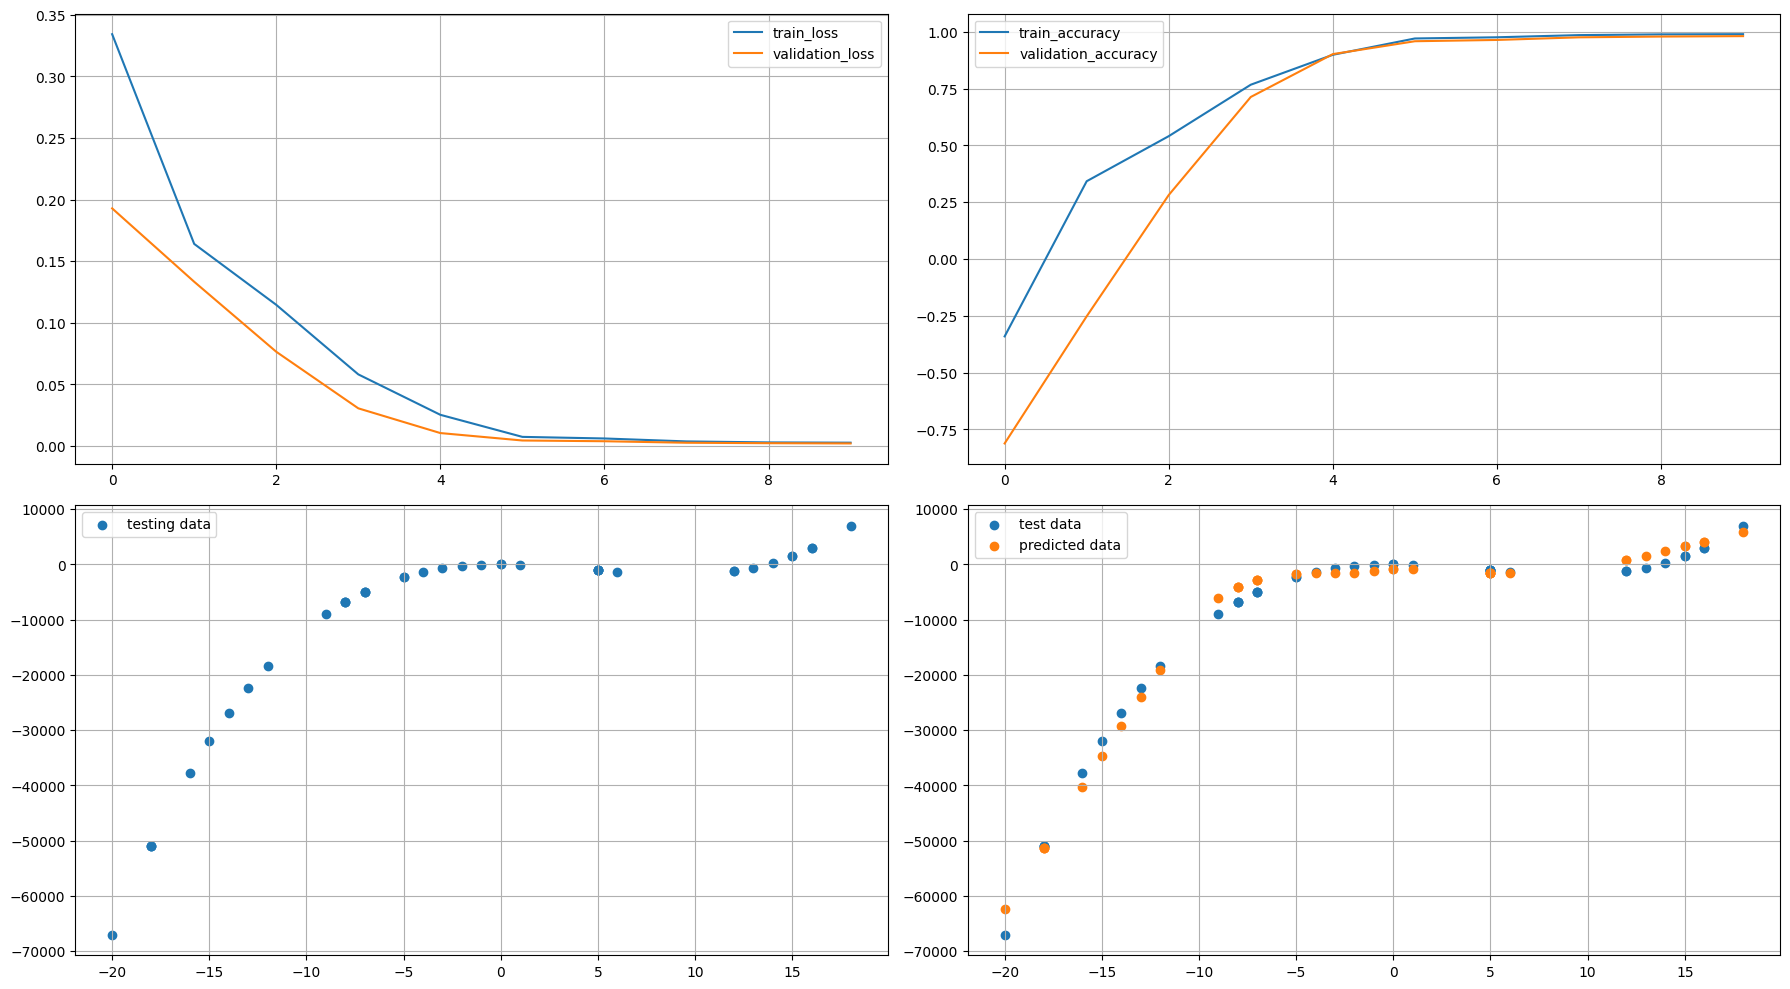

In [63]:
performance_dict = history.history
plt.figure(figsize = (18, 10))

plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
plt.grid()

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x_test, y_test)
plt.legend(['testing data'])
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.legend(['test data', 'predicted data'])
plt.grid()

plt.tight_layout()
plt.show()

In [64]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 [==============================] - 0s 12ms/step - loss: 417894944.0000 - r2_score: -0.3198
Test Loss: 417894944.0
Test Accuracy: -0.31984245777130127
